Original Image: player.jpg


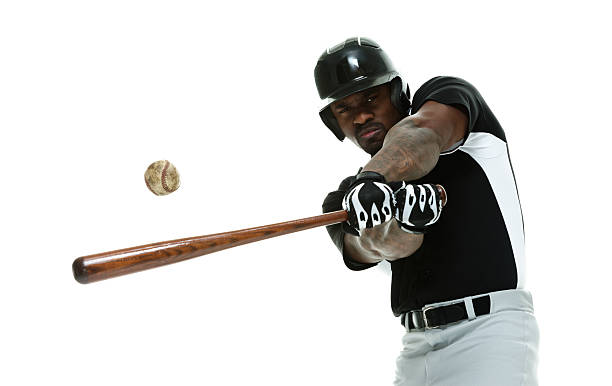

GradCAM Visualization: player_grad_cam.png


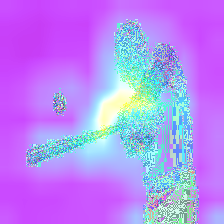

Original Image: p1.jpg


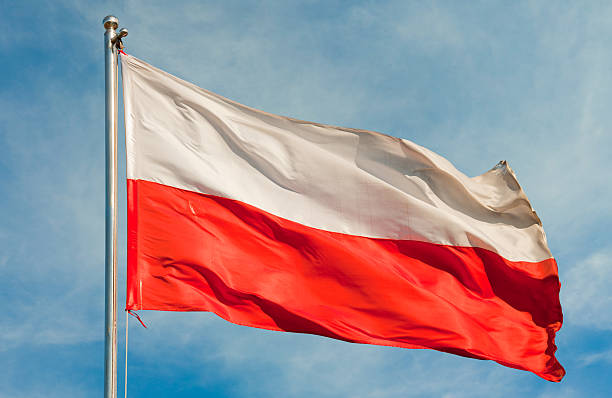

GradCAM Visualization: p1_grad_cam.png


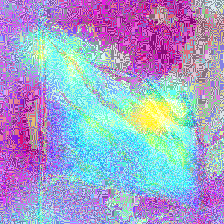

In [ ]:
from tf_explain.core.grad_cam import GradCAM
from IPython.display import Image, display
import tensorflow as tf

indices = [263, 281]
IMAGE_PATHS = ["player.jpg", "p1.jpg"]  # Replace with your actual image paths

# Load the VGG16 model
model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

# Loop through image paths and indices
for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(each_path, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)  # Preprocess the image for VGG16
    data = ([img], None)

    # Define the name for saving the result
    name = each_path.split("/")[-1].split(".jpg")[0]

    # Create a GradCAM explainer and generate the heatmap
    explainer = GradCAM()
    grid = explainer.explain(data, model, layer_name='block5_conv3', class_index=index)

    # Save the GradCAM visualization
    grad_cam_path = f"{name}_grad_cam.png"
    explainer.save(grid, '.', grad_cam_path)

    # Display the original image and GradCAM visualization
    print(f"Original Image: {each_path}")
    display(Image(filename=each_path))
    print(f"GradCAM Visualization: {grad_cam_path}")
    display(Image(filename=grad_cam_path))
